# 1주차 3교시 데이터 분석(EDA) 실습 과제
### 아래 설명을 읽고 질문에 답해주세요.   
#### 해당 과제에 대한 부담 없이 아래 코드의 순서를 따라와주시면서 데이터 분석과정에 대한 공부를 한다고 생각해주시면 됩니다☀️   
   
   ### 📍세션의 과제는 아래에 있습니다. 실습을 마친 후 실습완료하신 내용을 기반으로 과제를 수행 후 GitHub에 업로드 해주세요!📍



In [3]:
import pandas as pd # pandas와 numpy import
import numpy as np

# 데이터 로드
df = pd.read_csv('/과제데이터_online_retail.csv') # pd.read_csv()를 사용하여 CSV 파일을 데이터프레임(df)으로 로드

# 1. 결측치 처리
print("결측치 개수:\n", df.isnull().sum()) # 각 열의 결측치 개수를 출력
df.dropna(inplace=True) # 결측치가 있는 행을 제거 (원본 데이터프레임을 직접 수정)

# 2. 이상치 처리
# IQR 방식으로 이상치 탐지 및 제거
# Quantity와 UnitPrice 열에 대해 각각 IQR을 계산하고, 이상치를 제거
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity # IQR은 데이터의 25% 분위수(Q1)와 75% 분위수(Q3)의 차이

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# 이상치가 제거된 데이터만 남기고 데이터프레임을 재정의
df = df[
    (df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity) &
    (df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)
]

# 3. Total_Amount 열 생성
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
print("전처리 완료. 데이터 크기:", df.shape)

결측치 개수:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
전처리 완료. 데이터 크기: (10000, 9)


### 2. 기술통계 및 EDA
#### 요구사항
1. `UnitPrice`와 `Quantity`의 기술통계(평균, 중앙값, 표준편차)를 계산하시오.
2. `Country`별 `Total_Amount`의 합계를 계산하고, 상위 5개 국가를 출력하시오.
3. 다음 내용을 시각화하시오:
   - `UnitPrice`의 분포를 히스토그램으로 나타내기.
   - `Country`별 `Total_Amount`를 막대 그래프로 시각화하기.

기술통계:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
상위 5개 국가:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


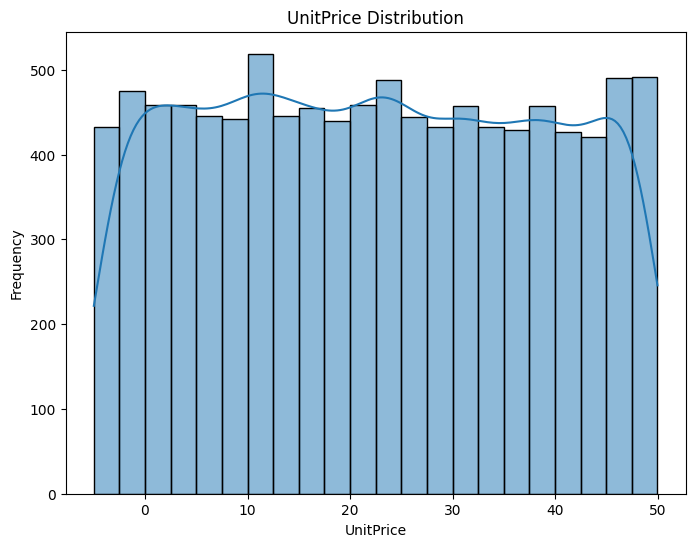

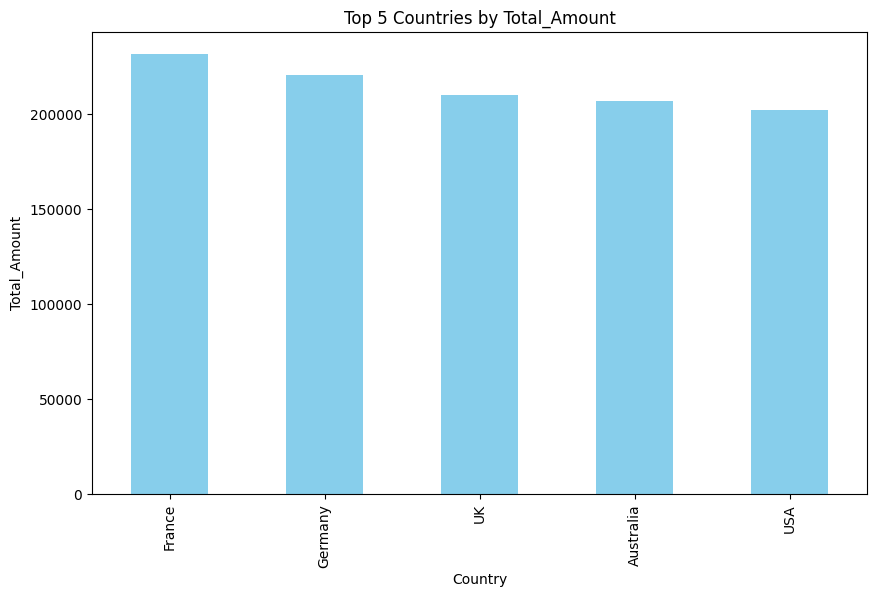

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 기술통계
print("기술통계:\n", df[['UnitPrice', 'Quantity']].describe()) # UnitPrice와 Quantity 열에 대한 기술통계를 계산

# 2. Country별 Total_Amount 합계
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5) # Country 열을 기준으로 그룹화하고, 각 국가의 Total_Amount 합계를 계산해서 내림차순 정렬 (상위 5개국)
print("상위 5개 국가:\n", country_sales)

# 3. 시각화
# UnitPrice 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True) # UnitPrice 열의 분포를 히스토그램으로 시각화 (커널 밀도 추정 곡선)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# 상위 5개 국가의 Total_Amount 시각화 (5개국 총 매출 비교)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue') # country_sales(상위 5개 국가의 총 매출)를 막대 그래프로 시각화
plt.title('Top 5 Countries by Total_Amount')
plt.xlabel('Country')
plt.ylabel('Total_Amount')
plt.show()

### 3. 상관분석
#### 요구사항
1. `Quantity`와 `Total_Amount` 간의 상관계수를 계산하시오:
   - Pearson 상관계수와 Spearman 상관계수를 각각 계산하시오.
2. 상관분석 결과를 해석하시오:
   - 두 변수 간 관계가 강한지, 약한지, 선형 관계가 있는지 설명하시오.

In [5]:
# 상관 분석 (두 변수 간의 선형적 관계 측정하고 분석하는 기법)
# pearson(연속형 변수에 적합, 정규분포 따르는 경우) : 1에 가까울 수록 양의 선형 관계, -1에 가까울 수록 음의 선형 관계
# spearman(비선형 변수에 적합) : -1 or 1에 가까우면 두 변수간의 순위 관계 강해짐, 0에 가까울 수록 순위 관계 약하거나 없음

from scipy.stats import pearsonr, spearmanr

# Pearson 상관계수
pearson_corr, _ = pearsonr(df['Quantity'], df['Total_Amount'])

# Spearman 상관계수
spearman_corr, _ = spearmanr(df['Quantity'], df['Total_Amount'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7764295146911373
Spearman Correlation: 0.8150877232931539


### 4. Feature Engineering
#### 요구사항
1. `InvoiceDate`에서 연도와 월을 추출하여 `Year`와 `Month` 열을 생성하시오.
2. 월별 `Total_Amount`의 합계를 계산하고, 시간에 따른 추세를 시각화하시오.

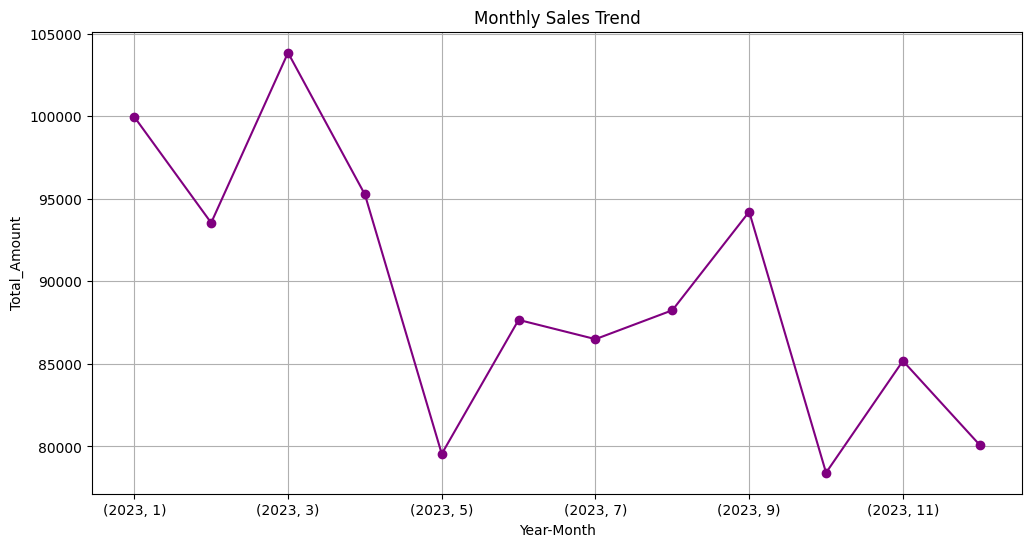

In [6]:
# 연도와 월 추출
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # InvoiceDate 열을 날짜 형식(datetime)으로 변환 -> 날짜와 관련된 다양한 연산(예: 연도, 월 추출)을 수행 가능
df['Year'] = df['InvoiceDate'].dt.year # InvoiceDate에서 연도(year)를 추출하여 새로운 열 Year를 생성
df['Month'] = df['InvoiceDate'].dt.month # InvoiceDate에서 월(month)을 추출하여 새로운 열 Month를 생성

# 월별 Total_Amount 합계
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum() # Year와 Month를 기준으로 그룹화하고, 각 그룹의 Total_Amount 합계를 계산

# 시각화
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple') # monthly_sales를 선 그래프(line)로 시각화 (각 데이터 포인트에 마커(원)를 표시)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total_Amount')
plt.grid()
plt.show()

### 5. 회귀분석 및 회귀진단
#### 요구사항
1. `Quantity`를 독립변수, `Total_Amount`를 종속변수로 사용하여 단순 선형 회귀 모델을 생성하시오.
2. 회귀 계수와 \( R^2 \) 값을 계산하시오.
3. 잔차의 정규성을 Q-Q Plot으로 확인하시오.
4. 잔차와 예측값 간의 관계를 산점도로 나타내고, 결과를 해석하시오.

Coefficient: 22.29907179755736
Intercept: 2.8639784184311026
R^2 Score: 0.6028427912835151


<Figure size 800x600 with 0 Axes>

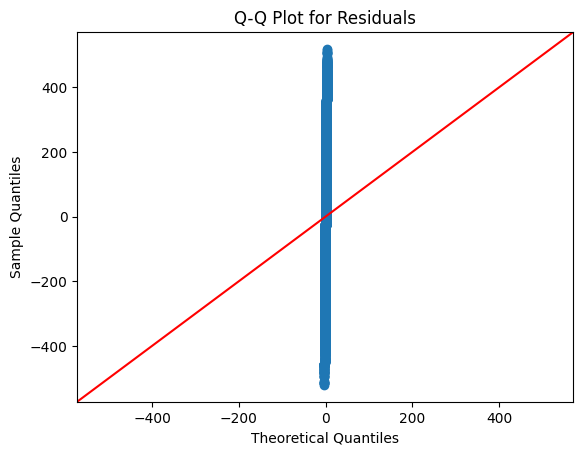

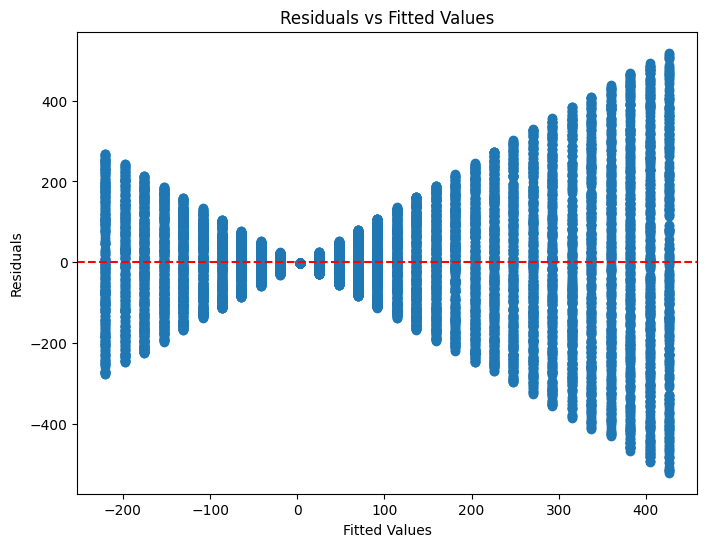

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# 회귀 분석
X = df[['Quantity']] # 독립 변수(설명 변수)로 Quantity(수량)을 선택
y = df['Total_Amount'] # 종속 변수(반응 변수)로 Total_Amount(총 금액)을 설정
# 즉, "수량(Quantity)이 총 금액(Total_Amount)에 어떤 영향을 미치는가?"를 분석하려는 것
model = LinearRegression()
model.fit(X, y) # X와 y 데이터를 학습하여 선형 회귀 모델을 생성
y_pred = model.predict(X) # 학습된 모델을 이용해 y_pred(예측값)를 계산

# 회귀 계수 및 R^2
print(f"Coefficient: {model.coef_[0]}") # 독립 변수(Quantity)가 한 단위 증가할 때 종속 변수(Total_Amount)가 얼마나 변하는지 (기울기 계수)
print(f"Intercept: {model.intercept_}") # Quantity = 0일 때 Total_Amount의 예상 값 (절편)
print(f"R^2 Score: {r2_score(y, y_pred)}") # 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표 (1에 가까울수록 성능이 좋음)

# 잔차 분석
residuals = y - y_pred # 진차 : 실제 값(y) - 예측 값(y_pred)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45') # 잔차가 정규성을 만족하면 45도 직선(line='45')을 따라야 함
plt.title('Q-Q Plot for Residuals') # 잔차가 정규 분포를 따르는지
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

__________
# 이제 과제 시작!

### 1. 데이터 로드
#### 요구사항
- 주어진 `online_retail.csv` 파일을 불러오세요.
- 데이터를 확인하고, 컬럼 정보를 출력하세요.

In [16]:
# 1. 데이터 로드
import pandas as pd
df = pd.read_csv('/과제데이터_online_retail.csv')

# 데이터 확인
# TODO: 데이터의 상단 몇 개 행을 출력하는 코드를 작성하세요.
print(f"칼럼 정보 출력 : {df.columns}\n")
print(f"상단 몇 개의 행 출력하는 코드 작성 : {df}")

칼럼 정보 출력 : Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

상단 몇 개의 행 출력하는 코드 작성 :      InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
0       I07271      S089  Product 67        12  2023-09-20  17.305292   
1       I00861      S095   Product 4        12  2023-05-31  34.734999   
2       I05391      S041  Product 96        -6  2023-07-31  36.367197   
3       I05192      S081   Product 1        -8  2023-07-11  34.778332   
4       I05735      S047  Product 34        18  2023-08-31  11.037961   
...        ...       ...         ...       ...         ...        ...   
9995    I04678      S046  Product 46        10  2023-02-12  -2.337636   
9996    I02219      S059  Product 80        11  2023-03-23   3.917652   
9997    I01390      S070  Product 11        -3  2023-01-27  15.916445   
9998    I04277      S008  Product 49         9  2023-10-31   8.130918   
9999    I01250     

### 2. 데이터 전처리
#### 요구사항
1. 결측치가 포함된 데이터를 처리하시오.
2. 이상치를 탐지하고 제거하시오:
   - `Quantity`와 `UnitPrice`에서 IQR 방식을 사용하세요.
3. 새로운 열 `Total_Amount`를 추가하시오:
   - `Total_Amount = Quantity × UnitPrice`

In [18]:
# 결측치 처리
# TODO: 결측치가 포함된 데이터를 확인하고 제거하는 코드를 작성하세요.
df.dropna(inplace=True) # 결측치가 있는 행을 제거

# 이상치 처리
# TODO: Quantity와 UnitPrice 변수에 대한 IQR을 출력하는 함수를 만드세요(e. def iqr(변수명))
def iqr(variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1 # IQR은 데이터의 25% 분위수(Q1)와 75% 분위수(Q3)의 차이
    return Q1, Q3, IQR

# TODO: Quantity와 UnitPrice 변수를 제작한 함수에 넣어 결과를 출력하세요.
# 각 변수의 IQR 계산
Q1_quantity, Q3_quantity, IQR_quantity = iqr('Quantity')
Q1_unitprice, Q3_unitprice, IQR_unitprice = iqr('UnitPrice')

df = df[
    (df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity) &
    (df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)
]

# Total_Amount 열 생성
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

### 3. 기술통계 및 EDA
#### 요구사항
1. `UnitPrice`와 `Quantity`의 기술통계를 계산하시오.
2. `Country`별 `Total_Amount`의 합계를 계산하고, 상위 5개 국가를 출력하시오.
3. 다음 내용을 시각화하시오:
   - `UnitPrice`의 분포를 히스토그램으로 나타내기.
   - `Country`별 `Total_Amount`를 막대 그래프로 시각화하기.

기술통계:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
상위 5개 국가:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


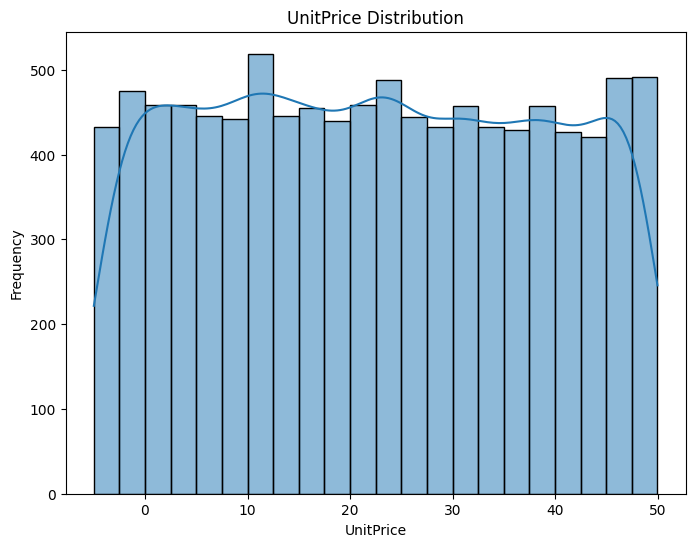

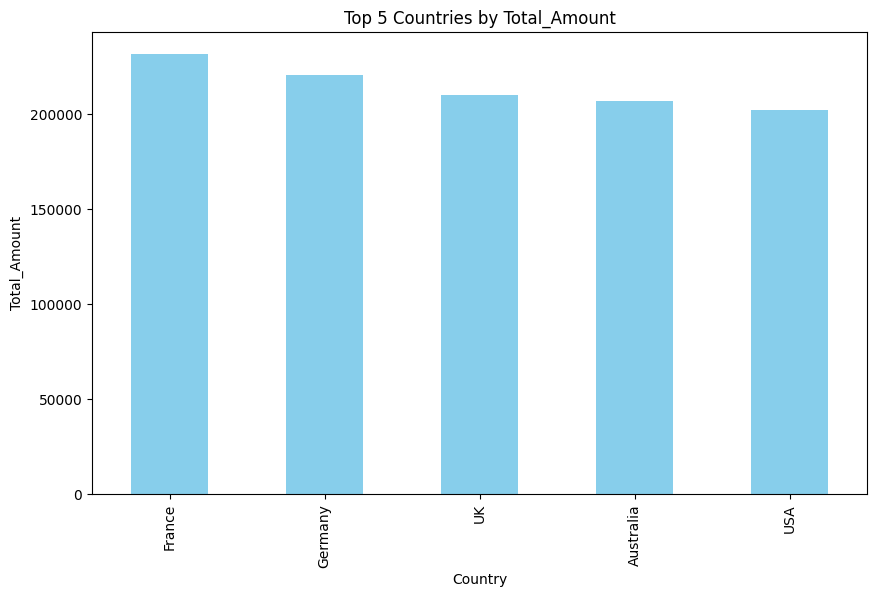

In [19]:
# 기술통계
# TODO: UnitPrice와 Quantity의 기술통계를 계산하는 코드를 작성하세요.
print("기술통계:\n", df[['UnitPrice', 'Quantity']].describe()) # UnitPrice와 Quantity 열에 대한 기술통계를 계산

# Country별 Total_Amount 합계
# TODO: Country별 Total_Amount를 계산하고, 상위 5개 국가를 출력하는 코드를 작성하세요.
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5) # Country 열을 기준으로 그룹화하고, 각 국가의 Total_Amount 합계를 계산해서 내림차순 정렬 (상위 5개국)
print("상위 5개 국가:\n", country_sales)

# 히스토그램
# TODO: UnitPrice의 분포를 시각화하세요.
# UnitPrice 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True) # UnitPrice 열의 분포를 히스토그램으로 시각화 (커널 밀도 추정 곡선)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# 상위 5개 국가의 Total_Amount 시각화 (5개국 총 매출 비교)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue') # country_sales(상위 5개 국가의 총 매출)를 막대 그래프로 시각화
plt.title('Top 5 Countries by Total_Amount')
plt.xlabel('Country')
plt.ylabel('Total_Amount')
plt.show()